## Import Libraries

In [4]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [5]:
path=Path(r"\\sedna\jokin.ormazabal$\$Profile\Desktop\w4 edited\online_gaming_behavior_dataset.csv")
data=pd.read_csv(path)
print(data)

       PlayerID  Age  Gender Location   GameGenre  PlayTimeHours  \
0          9000   43    Male    Other    Strategy      16.271119   
1          9001   29  Female      USA    Strategy       5.525961   
2          9002   22  Female      USA      Sports       8.223755   
3          9003   35    Male      USA      Action       5.265351   
4          9004   33    Male   Europe      Action      15.531945   
...         ...  ...     ...      ...         ...            ...   
40029     49029   32    Male      USA    Strategy      20.619662   
40030     49030   44  Female    Other  Simulation      13.539280   
40031     49031   15  Female      USA         RPG       0.240057   
40032     49032   34    Male      USA      Sports      14.017818   
40033     49033   19    Male      USA      Sports      10.083804   

       InGamePurchases GameDifficulty  SessionsPerWeek  \
0                    0         Medium                6   
1                    0         Medium                5   
2        

## Data Exploration and Pre-Preparation

In [6]:
data.drop_duplicates()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [7]:
data['Age'].value_counts()

Age
31    1228
37    1219
27    1217
40    1202
42    1187
29    1187
43    1180
18    1167
44    1166
32    1163
36    1154
24    1153
35    1151
30    1150
22    1150
17    1149
38    1140
19    1139
16    1138
23    1130
39    1128
21    1128
33    1123
46    1121
20    1113
41    1111
25    1108
28    1108
45    1108
26    1107
49    1106
34    1103
47    1102
15    1101
48    1097
Name: count, dtype: int64

In [8]:
data['Gender'].value_counts()

Gender
Male      23959
Female    16075
Name: count, dtype: int64

In [9]:
data['Location'].value_counts()

Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

In [10]:
data['GameGenre'].value_counts()

GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

In [11]:
data['InGamePurchases'].value_counts()

InGamePurchases
0    31993
1     8041
Name: count, dtype: int64

In [12]:
data['GameDifficulty'].value_counts()

GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [14]:
data.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

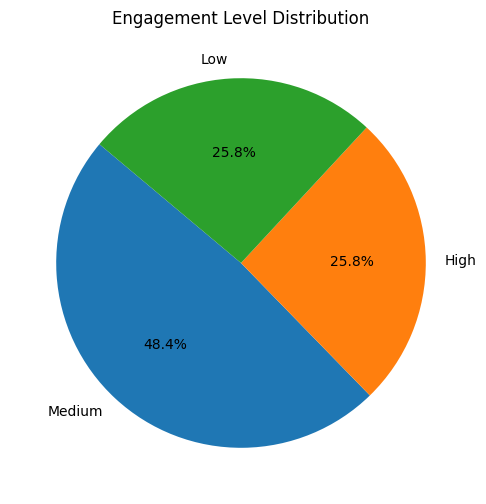

In [15]:
engagement_counts = data['EngagementLevel'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(engagement_counts, labels=engagement_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Engagement Level Distribution')
plt.show()

In [16]:
data = data.drop(['PlayerID'], axis=1)

In [17]:
# Descriptive statistics for the numerical columns
descriptive_stats = data.describe()

print(descriptive_stats)

                Age  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
count  40034.000000   40034.000000     40034.000000     40034.000000   
mean      31.992531      12.024365         0.200854         9.471774   
std       10.043227       6.914638         0.400644         5.763667   
min       15.000000       0.000115         0.000000         0.000000   
25%       23.000000       6.067501         0.000000         4.000000   
50%       32.000000      12.008002         0.000000         9.000000   
75%       41.000000      17.963831         0.000000        14.000000   
max       49.000000      23.999592         1.000000        19.000000   

       AvgSessionDurationMinutes   PlayerLevel  AchievementsUnlocked  
count               40034.000000  40034.000000          40034.000000  
mean                   94.792252     49.655568             24.526477  
std                    49.011375     28.588379             14.430726  
min                    10.000000      1.000000              0.00000

In [18]:
# List of categorical columns
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']

# Determining numerical columns by excluding categorical columns and checking data types
numerical_columns = [column for column in data.columns if column not in categorical_columns and data[column].dtype in ['int64', 'float64']]

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
Numerical Columns: ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']


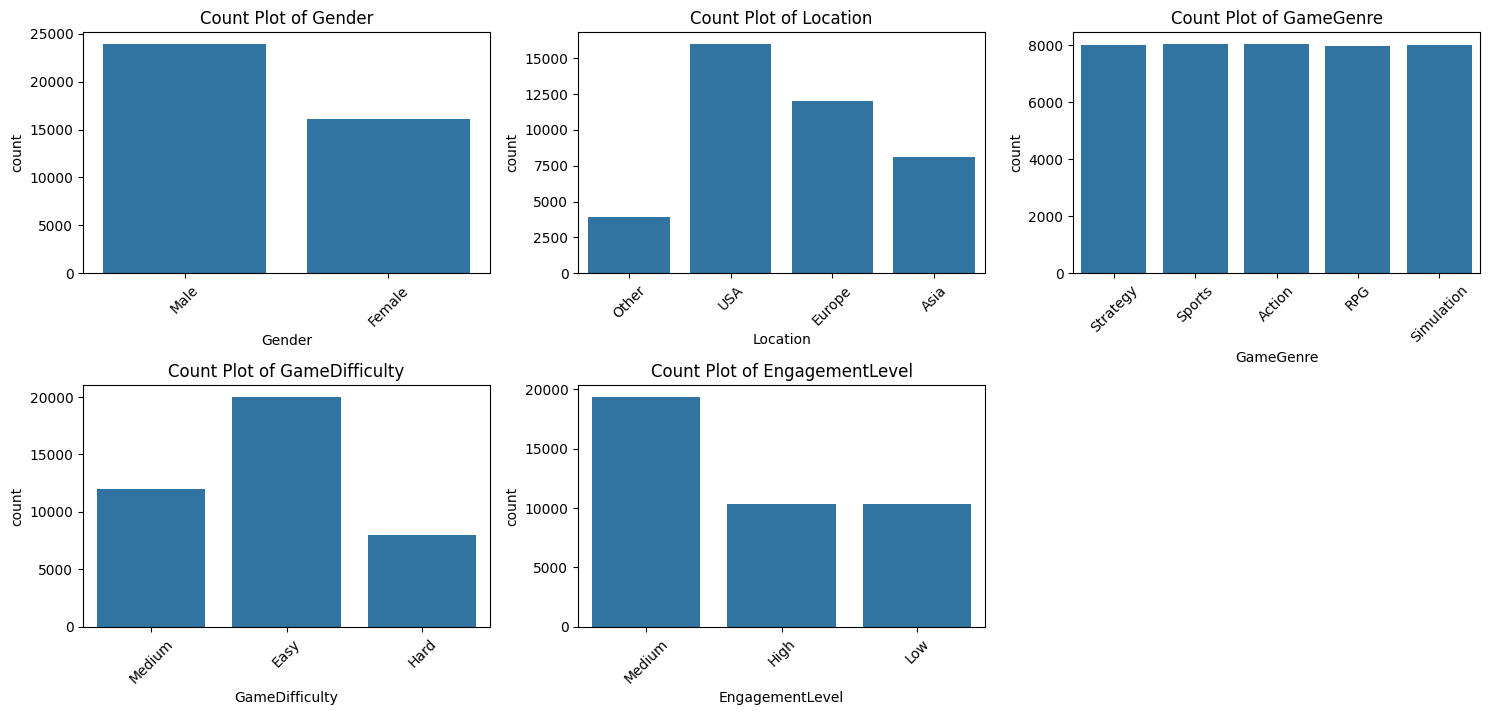

In [19]:
# Plot count plots for categorical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=data[column])
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

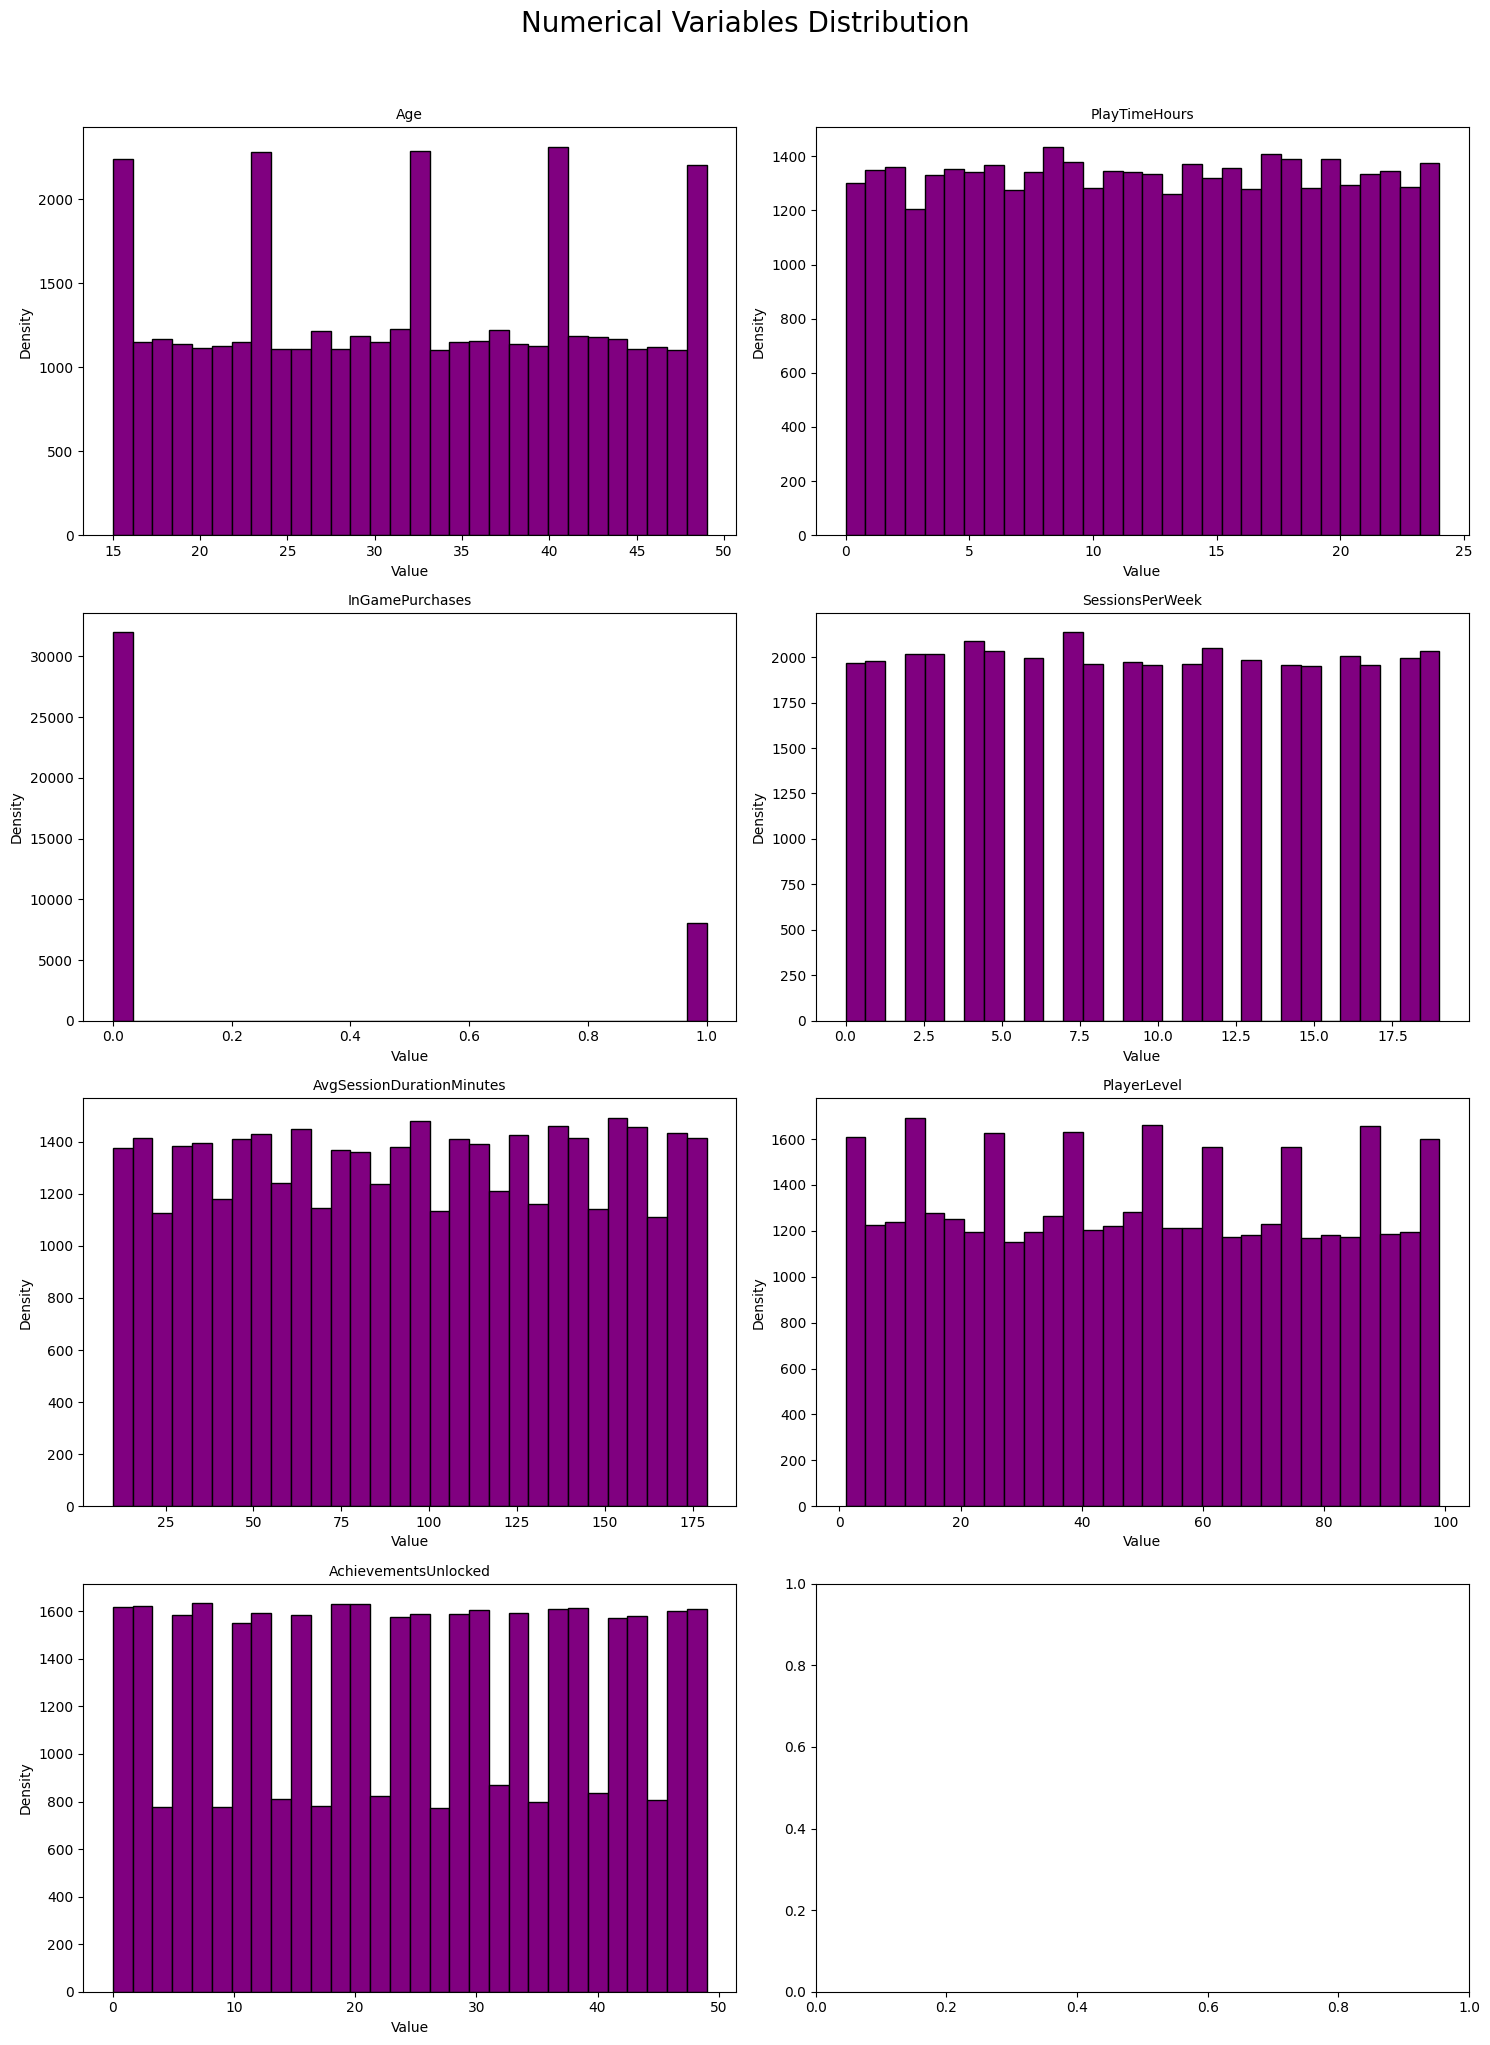

In [20]:
# Plot histograms for each numerical column
fig, axs = plt.subplots(len(numerical_columns) // 2 + len(numerical_columns) % 2, 2, figsize=(15, 20))
axs = axs.flatten()
for i, column in enumerate(numerical_columns):
    vc = data[column].value_counts(normalize=True)  
    axs[i].hist(data[column], bins=30, edgecolor='black', color='purple') 
    axs[i].set_title(column, fontsize=10)  
    axs[i].set_xlabel('Value')  
    axs[i].set_ylabel('Density') 
plt.suptitle('Numerical Variables Distribution', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

Encoding the categorical data

In [21]:
engagement_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

data['EngagementLevel'] = data['EngagementLevel'].map(engagement_mapping)

print("DataFrame with Encoded 'EngagementLevel':")
print(data)

DataFrame with Encoded 'EngagementLevel':
       Age  Gender Location   GameGenre  PlayTimeHours  InGamePurchases  \
0       43    Male    Other    Strategy      16.271119                0   
1       29  Female      USA    Strategy       5.525961                0   
2       22  Female      USA      Sports       8.223755                0   
3       35    Male      USA      Action       5.265351                1   
4       33    Male   Europe      Action      15.531945                0   
...    ...     ...      ...         ...            ...              ...   
40029   32    Male      USA    Strategy      20.619662                0   
40030   44  Female    Other  Simulation      13.539280                0   
40031   15  Female      USA         RPG       0.240057                1   
40032   34    Male      USA      Sports      14.017818                1   
40033   19    Male      USA      Sports      10.083804                0   

      GameDifficulty  SessionsPerWeek  AvgSessionDuration

In [22]:
le_gender = LabelEncoder()
le_location = LabelEncoder()
le_gGenre = LabelEncoder()
le_gDiff = LabelEncoder()

# Fit and transform categorical features
data['Gender'] = le_gender.fit_transform(data['Gender'])
data['Location'] = le_location.fit_transform(data['Location'])
data['GameGenre'] = le_gGenre.fit_transform(data['GameGenre'])
data['GameDifficulty'] = le_gDiff.fit_transform(data['GameDifficulty'])

print("Encoded DataFrame:")
print(data)

Encoded DataFrame:
       Age  Gender  Location  GameGenre  PlayTimeHours  InGamePurchases  \
0       43       1         2          4      16.271119                0   
1       29       0         3          4       5.525961                0   
2       22       0         3          3       8.223755                0   
3       35       1         3          0       5.265351                1   
4       33       1         1          0      15.531945                0   
...    ...     ...       ...        ...            ...              ...   
40029   32       1         3          4      20.619662                0   
40030   44       0         2          2      13.539280                0   
40031   15       0         3          1       0.240057                1   
40032   34       1         3          3      14.017818                1   
40033   19       1         3          3      10.083804                0   

       GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  \
0          

## Data Split

In [23]:
y = data['EngagementLevel']
X = data.drop(columns=['EngagementLevel'])
data

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,1,2,4,16.271119,0,2,6,108,79,25,1
1,29,0,3,4,5.525961,0,2,5,144,11,10,1
2,22,0,3,3,8.223755,0,0,16,142,35,41,2
3,35,1,3,0,5.265351,1,0,9,85,57,47,1
4,33,1,1,0,15.531945,0,2,2,131,95,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,1,3,4,20.619662,0,0,4,75,85,14,1
40030,44,0,2,2,13.539280,0,1,19,114,71,27,2
40031,15,0,3,1,0.240057,1,0,10,176,29,1,2
40032,34,1,3,3,14.017818,1,2,3,128,70,10,1


In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Models

In [25]:
# Define the models and hyperparameters for tuning
models = {
    'Logistic Regression': {
        'model': LogisticRegression(multi_class='multinomial', solver='lbfgs'),  # 'multinomial' for multiclass, 'lbfgs' solver
        'params': {
            'penalty': ['l2'],
            'C': [0.1, 1, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.1, 1, 10]
        }
    }
}

results = {}

for name, config in models.items():
    print(f"Training {name}...")

    pipeline = Pipeline([
        ('model', config['model'])
    ])

    grid = GridSearchCV(pipeline, {'model__' + k: v for k, v in config['params'].items()}, cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)

    results[name] = {
        'best_params': grid.best_params_,
        'best_score': grid.best_score_,
        'test_score': grid.score(X_test, y_test)
    }

for name, result in results.items():
    print(f"\n{name}:")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Best Training Score: {result['best_score']:.4f}")
    print(f"  Test Score: {result['test_score']:.4f}")

# Classification reports
for name, result in results.items():
    print(f"\nClassification Report for {name}:")
    
    best_params = {param.replace('model__', ''): value for param, value in result['best_params'].items()}
    
    model = models[name]['model'].set_params(**best_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

Training Logistic Regression...


c:\Users\jokin.ormazabal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest...
Training SVM...

Logistic Regression:
  Best Parameters: {'model__C': 0.1, 'model__penalty': 'l2'}
  Best Training Score: 0.8248
  Test Score: 0.8208

Random Forest:
  Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 200}
  Best Training Score: 0.9131
  Test Score: 0.9103

SVM:
  Best Parameters: {'model__C': 1, 'model__kernel': 'rbf'}
  Best Training Score: 0.8974
  Test Score: 0.8930

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      2093
           1       0.80      0.89      0.84      3879
           2       0.89      0.82      0.85      2035

    accuracy                           0.82      8007
   macro avg       0.83      0.80      0.81      8007
weighted avg       0.82      0.82      0.82      8007


Classification Report for Random Forest:


c:\Users\jokin.ormazabal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2093
           1       0.90      0.95      0.93      3879
           2       0.92      0.87      0.90      2035

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.91      8007
weighted avg       0.91      0.91      0.91      8007


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2093
           1       0.88      0.94      0.91      3879
           2       0.92      0.86      0.89      2035

    accuracy                           0.89      8007
   macro avg       0.90      0.88      0.89      8007
weighted avg       0.89      0.89      0.89      8007

